In [24]:
import numpy as np
import platform

# This fixes NSInvalidArgumentException from tkinter on OSX
if platform.system() == "Darwin": 
    import matplotlib
    matplotlib.use("TkAgg")
    from matplotlib import pyplot as plt
else:
    import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


filename = "csv/EthanHollander.csv"

results = np.genfromtxt(filename, delimiter=',', skip_header=1)

author = filename.split("/")[-1].strip(".csv")

def odd(f):
    """Rounds up to the neareat odd number."""
    return int(np.ceil(f)//2*2+1)

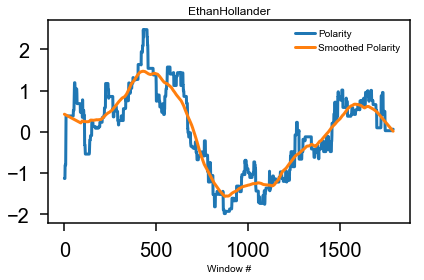

In [44]:
# Normalize the data 
# by shiting by the the mean
# and scaling by the std dev

pol = results[:,1]
pol_norm = (pol-np.mean(pol))/np.std(pol)


# Smooth the data

smooth_window = odd(len(pol_norm)//10)

smooth_pol = savgol_filter(pol_norm, smooth_window, 1)


# Plot

plt.title(author)
plt.plot(results[:,0], pol_norm, label="Polarity")
plt.plot(results[:,0], smooth_pol, label="Smoothed Polarity")
plt.legend()
plt.xlabel("Window #")
plt.show()

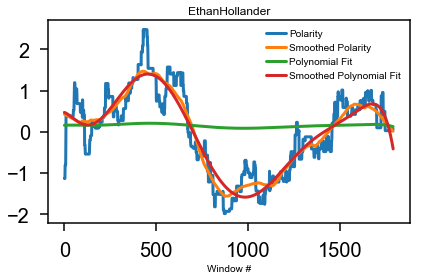

In [55]:
deg = 8

sm_coeffs = np.polyfit(results[:,0],smooth_pol,deg)
coeffs = np.polyfit(results[:,0],pol,deg)


sm_p = np.poly1d(sm_coeffs)
p = np.poly1d(coeffs)


plt.title(author)
plt.plot(results[:,0], pol_norm, label="Polarity")
plt.plot(results[:,0], smooth_pol, label="Smoothed Polarity")
plt.plot(results[:,0], p(results[:,0]), label="Polynomial Fit")
plt.plot(results[:,0], sm_p(results[:,0]), label="Smoothed Polynomial Fit")
plt.legend()
plt.xlabel("Window #")
plt.show()